<a href="https://colab.research.google.com/github/Danielrh78/Trabajo-Final-de-Aplicacion/blob/main/Trabajo_Final_Juan_Esteban_Acosta_y_Daniel_Rodriguez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daniel Rodriguez - Juan Esteban Acosta

Universidad Externado de Colombia

Finanzas Computacionales

Trabajo Final de Aplicacion

In [212]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans



In [213]:
# Descargamos la info disponible en GitHub
!wget https://raw.githubusercontent.com/Danielrh78/caracteristicas-vinos/main/vinos%20caracteristicas%202.csv

--2022-05-16 17:49:06--  https://raw.githubusercontent.com/Danielrh78/caracteristicas-vinos/main/vinos%20caracteristicas%202.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11674 (11K) [text/plain]
Saving to: ‘vinos caracteristicas 2.csv.4’

vinos caracteristic 100%[===================>]  11.40K  --.-KB/s    in 0s      

2022-05-16 17:49:06 (79.7 MB/s) - ‘vinos caracteristicas 2.csv.4’ saved [11674/11674]



In [214]:
df = pd.read_csv('https://raw.githubusercontent.com/Danielrh78/vinos/main/vinos.csv',sep=',')
df = pd.DataFrame(df).dropna()
df

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,174,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,175,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,176,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,177,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


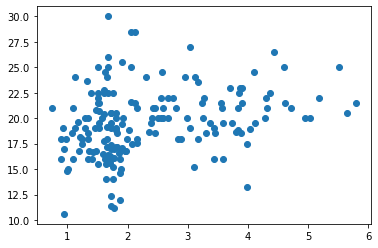

In [215]:
X = pd.concat([df['Malic'],df['Alcalinity']],axis=1)#.values
plt.scatter(X['Malic'], X['Alcalinity'])

In [219]:
n_clusters = 2  # K
km = KMeans( n_clusters=n_clusters)
km.fit(X)
y = km.predict(X)

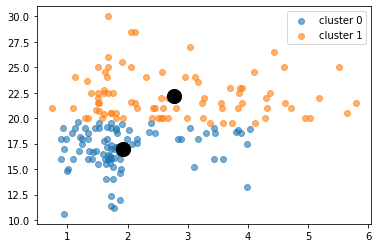

In [220]:
centers = km.cluster_centers_
for i in np.unique(y):
    Xr = X[y==i]
    plt.scatter(Xr['Malic'], Xr['Alcalinity'], label="cluster %d"%i, alpha=.6)
plt.scatter(centers[:,0], centers[:,1], s=200, color="black")
plt.legend()

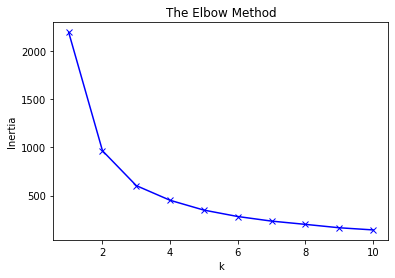

In [224]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
  
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

In [225]:
K = range(1,4)
for k in K:
    km = KMeans(n_clusters=3)
    km = km.fit(X)
    y = km.predict(X)
    print("Experiment con k={}".format(k))
    for i in range(0, k):
      num_comp = np.sum(y==i)
      m_cluster = X[y==i]
      print("Cluster: {}, Datos: {}".format(i, num_comp))  

Experiment con k=1
Cluster: 0, Datos: 61
Experiment con k=2
Cluster: 0, Datos: 61
Cluster: 1, Datos: 33
Experiment con k=3
Cluster: 0, Datos: 61
Cluster: 1, Datos: 33
Cluster: 2, Datos: 84


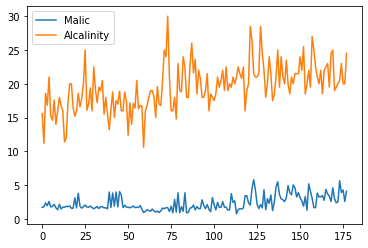

In [226]:
# Escalamiento de los datos
vino = pd.DataFrame(X)
from pandas.core.frame import DataFrame
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
Xs = ms.fit_transform(X)
Xs = pd.DataFrame(X)
Xs.plot()

In [227]:
# Escalamiento de los Valores
df = pd.DataFrame(Xs)
df = df.values
ms = MinMaxScaler()
ts = ms.fit_transform(X)

In [229]:
pd.Series(y).value_counts()

2    84
0    61
1    33
dtype: int64

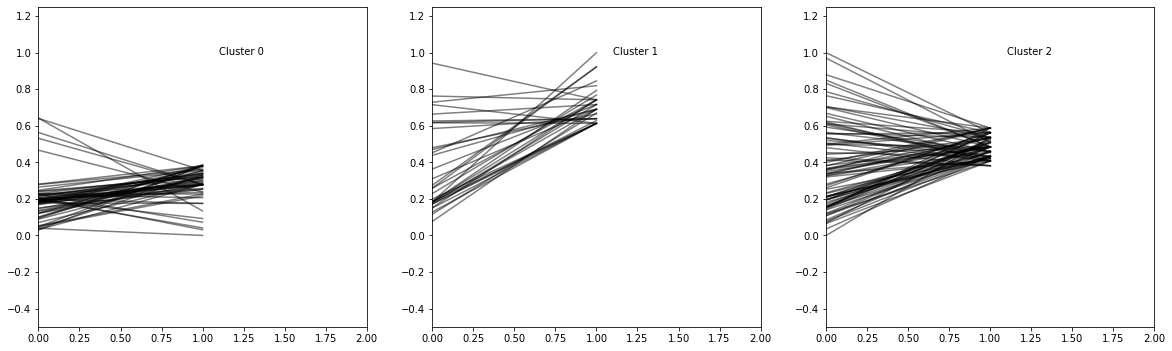

In [230]:
# Tambien se pueden identificar patrones en las series de tiempo
for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in ts[y == yi]:
        plt.plot(xx.ravel(), "k-", alpha=0.5)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, ts.shape[1])
    plt.ylim(-.5, 1.25)
    plt.text(0.55, 0.85,'Cluster %d' % (yi),
             transform=plt.gca().transAxes)
    plt.gcf().set_size_inches(20, 20)
    if yi == 10:
        plt.title("Paterns $k$-means")